In [1]:
import sys
sys.path.append('C:/Users/ug033207/dynamic scheduling/dynamic-scheduling/functions')
from point_rating import point_rating
from first_model import first_model
from dynamic_model import dynamic_model
from first_round_rating import first_round_rating
from Elo_rating import Elo_rating
from generate_results import generate_results

import random
from pyomo.environ import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time
import copy
import math
from itertools import permutations





In [2]:
n = 20

teams = list(range(1,n+1))
days = list(range(1,n))


#result_df = generate_results(teams)
result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain first half')
#result_df = generate_results(teams)
result_df = pd.DataFrame(result_df)

result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain second half')
#result_df2 = generate_results(teams)
#result_df2 = pd.DataFrame(result_df2)

#random.seed(1)
#Spanish old ratings
#old_ratings = {1:1983,2:1876,3:1869,4:1840,5:1827,6:1779,7:1756, 8:1739,9:1708,10:1698,11:1673,12:1669,13:1651,14:1648,15:1646,16:1631, 17:1630, 18:1617, 19:1615, 20:1610}
#German old ratings
#old_ratings = {1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579}



with pd.ExcelWriter('C:/Users/ug033207/match_resultlar2.xlsx', engine='xlsxwriter') as writer:
    # Write the first DataFrame to the 'random1' sheet
    result_df.to_excel(writer, sheet_name='random1', index=False)

    # Write the second DataFrame to the 'random2' sheet, specifying mode='a' (append)
    #result_df2.to_excel(writer, sheet_name='random2', index=False)

#days_dynamic = [x for x in days if x != 1] 




ok = []
ok2 = []


big_obj_values = []
big_obj_values2 = []


In [3]:
for p in range(1,20):
    ok = []
    k = math.ceil((n - 1) / p)
    rounds = [days[i*p:((i+1)*p)] for i in range(k)]
    rounds = list(filter(None, rounds))
    round1 = rounds[0]
    print(rounds)
    objective_values = []
    #old_ratings = {i: i for i in range(1, n+1)}
    #my_dict = {i: n-i for i in range(1, n+1)}
    #Spain
    old_rankings = {1:1, 2:2, 3:3, 4:7, 5:4, 6:5, 7:6, 8:8, 9:11, 10:9, 11:15, 12:10, 13:17, 14:14, 15:18, 16:13, 17:19, 18:12, 19:16, 20:20}
    #old_points = {1:86, 2:73, 3:71, 4:59, 5:70, 6:65, 7:62, 8:55, 9:46, 10:48, 11:39, 12:47, 13:39, 14:42, 15:38, 16:42, 17:36, 18:42, 19:39, 20:31}
    #old_ratings = {1:1983,2:1876,3:1869,4:1840,5:1827,6:1779,7:1756,8:1739,9:1708,10:1698,11:1673,12:1669,13:1651,14:1648,15:1646,16:1631, 17:1630, 18:1617, 19:1615, 20:1610}
    #points22 = {1:84, 2:79, 3:86, 4:58, 5:77, 6:61, 7:62, 8:46, 9:53, 10:43, 11:38, 12:44, 13:44, 14:46, 15:31, 16:36, 17:41, 18:38, 19:34, 20:30}
    #ranks22 = {1:2, 2:3, 3:1, 4:7, 5:4, 6:6, 7:5, 8:10, 9:8, 10:13, 11:15, 12:11, 13:12, 14:9, 15:19, 16:17, 17:14, 18:16, 19:18, 20:20}
    #Germany
    #old_ratings = {1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579}
    #old_rankings = {1:1, 2:4, 3:2, 4:3, 5:11, 6:5, 7:6, 8:10, 9:12, 10:8, 11:7, 12:9, 13:15, 14:14, 15:13, 16:16, 17:17, 18:18}
    #old_points = {1:77, 2:58, 3:69, 4:64, 5:11, 6:57, 7:55, 8:45, 9:42, 10:46, 11:52, 12:46, 13:33, 14:38, 15:42, 16:33, 17:28, 18:18}
    #aynı sezonun puanları:
    #old_points = {1:71, 2:66, 3:71, 4:50, 5:50, 6:62, 7:59, 8:43, 9:49, 10:46, 11:42, 12:36, 13:33, 14:34, 15:35, 16:29, 17:36, 18:31}
    #points20 = {i + 1: val for i, val in enumerate([78, 65, 64, 61, 60, 52, 50, 49, 45, 45, 43, 39, 36, 35, 35, 33, 31, 16])}
    #LEC
    #points = {1:78, 2:72, 3:67, 4:61, 5:50, 6:50, 7:44, 8:39, 9:22, 10:17}
    #points = {i: n-i for i in range(1,n+1)}
    old_ratings = old_rankings
    U_ij = np.zeros((n, n)) 
    ratings_array = np.array(list(old_ratings.values()))
    for i in range(n):
        for j in range(n):
            U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))

    ratings = old_ratings
    ratings_df = pd.DataFrame(U_ij, columns=teams, index=teams)

    solution_keeper = pd.DataFrame(columns=['Day', 'Team 1', 'Team 2'])
    solution_keeper.drop(solution_keeper.index, inplace=True)


    solution_df, obj_value = dynamic_model(teams, days, ratings_df, solution_keeper, round1)
    ok.append(obj_value)
    solution_keeper = pd.concat([solution_keeper, solution_df])
    ratings = {i: 0 for i in range(1, n+1)}
    U_ij = np.zeros((n, n)) 
    ratings_array = np.array(list(ratings.values()))
    for i in range(n):
        for j in range(n):
            U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))
    ratings_df = pd.DataFrame(U_ij, columns=teams, index=teams)

    for i in round1:
        
        obj_count = 0
        for _, row in solution_df.iterrows():
            team1 = row['Team 1']
            team2 = row['Team 2']
            day = row['Day']
            if i == day:
                obj_count += ratings_df.iloc[team1-1, team2-1]

        i= [i]
        print(ratings)
        ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df, i)
        print(obj_count)
        objective_values.append(obj_count)
        
    #ratings, ratings_df = first_round_rating(teams, solution_df, result_df)


    for r in rounds[1:]:
        solution_df, obj_value = dynamic_model(teams, days, ratings_df, solution_keeper, r)
        ok.append(obj_value)
        solution_keeper = pd.concat([solution_keeper, solution_df])

        for i in r:

            obj_count = 0
            for _, row in solution_df.iterrows():
                team1 = row['Team 1']
                team2 = row['Team 2']
                day = row['Day']
                if i == day:
                    obj_count += ratings_df.iloc[team1-1, team2-1]

            i= [i]
            print(ratings)
            ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df, i)
            print(obj_count)
            objective_values.append(obj_count)
            
    print(objective_values)

        


    solution_keeper2 = pd.DataFrame(columns=['Day', 'Team 1', 'Team 2'])
    solution_keeper2.drop(solution_keeper2.index, inplace=True)
    rounds2 = [days[i*p:((i+1)*p)] for i in range(k)]
    rounds2 = list(filter(None, rounds2))
    objective_values2 = []


    for r in rounds2:
        solution_df, obj_value = dynamic_model(teams, days, ratings_df, solution_keeper2, r)
        ok.append(obj_value)
        solution_keeper2 = pd.concat([solution_keeper2, solution_df])

        for i in r:
            
            obj_count = 0
            for _, row in solution_df.iterrows():
                team1 = row['Team 1']
                team2 = row['Team 2']
                day = row['Day']
                if i == day:
                    obj_count += ratings_df.iloc[team1-1, team2-1]
            
            i= [i]
            print(ratings)
            ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df2, i)
            objective_values2.append(obj_count)
            print(obj_count)
    ok[0] = 0        
                
    print(objective_values2)
    obje =  objective_values +objective_values2
    ok2.append(sum(ok))
    g = sum(obje)
    big_obj_values.append(g)
    big_obj_values2.append(big_obj_values)


[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16], [17, 18, 19]]
Optimal solution found.
Team 2 vs Team 3 in Slot 1
Team 4 vs Team 12 in Slot 1
Team 5 vs Team 1 in Slot 1
Team 7 vs Team 6 in Slot 1
Team 10 vs Team 8 in Slot 1
Team 11 vs Team 13 in Slot 1
Team 14 vs Team 9 in Slot 1
Team 15 vs Team 20 in Slot 1
Team 17 vs Team 19 in Slot 1
Team 18 vs Team 16 in Slot 1
Team 1 vs Team 7 in Slot 2
Team 3 vs Team 5 in Slot 2
Team 4 vs Team 8 in Slot 2
Team 6 vs Team 2 in Slot 2
Team 9 vs Team 12 in Slot 2
Team 10 vs Team 18 in Slot 2
Team 14 vs Team 16 in Slot 2
Team 15 vs Team 17 in Slot 2
Team 19 vs Team 13 in Slot 2
Team 20 vs Team 11 in Slot 2
Team 2 vs Team 1 in Slot 3
Team 5 vs Team 6 in Slot 3
Team 7 vs Team 4 in Slot 3
Team 8 vs Team 3 in Slot 3
Team 10 vs Team 9 in Slot 3
Team 11 vs Team 15 in Slot 3
Team 12 vs Team 16 in Slot 3
Team 14 vs Team 18 in Slot 3
Team 17 vs Team 13 in Slot 3
Team 20 vs Team 19 in Slot 3
Team 3 vs Team 1 in Slot 4
Team 4 vs Team 6 in Slot 4
T

In [ ]:
print(obj_conut_perm)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


0.0
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
102
0.0
102
0.0
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

ValueError: The number of FixedLocator locations (204), usually from a call to set_ticks, does not match the number of ticklabels (38).

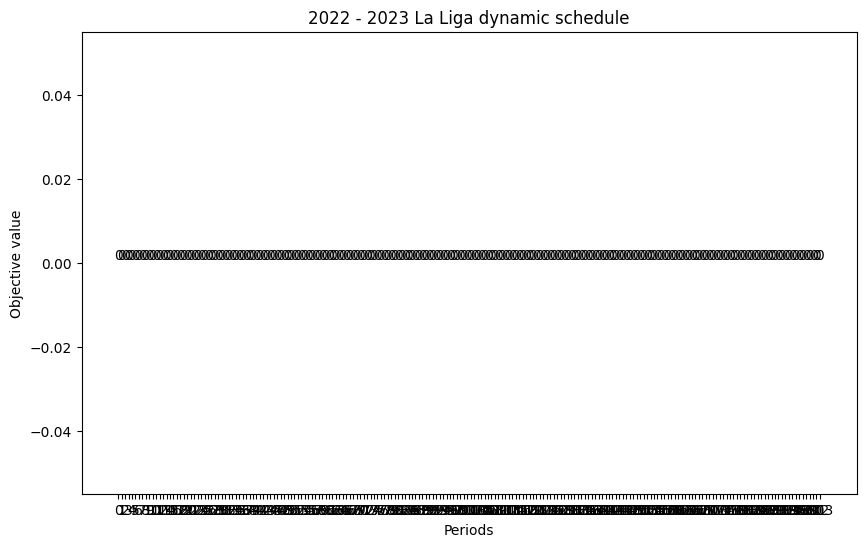

In [ ]:
print(sum(ok))
print(ratings)
print(objective_values)
print(len(objective_values))
print(sum(objective_values))
print(len(objective_values2))
print(sum(objective_values2))
obje =  objective_values + objective_values2
print(ratings)
obje = np.array(obje)
print(obje)
print(sum(obje))


plt.figure(figsize=(10,6))
bars = plt.bar(range(len(obje)), obje)
plt.bar_label(bars)
plt.xlabel('Periods')
plt.ylabel('Objective value')
plt.title('2022 - 2023 La Liga dynamic schedule')

# Change the x-axis tick labels
new_tick_labels = [i for i in range(1, 20)] + [i for i in range(20,39)]
#y = [i for i in range(20, 36)]  # New tick labels
#new_tick_labels2 = new_tick_labels + y
plt.xticks(range(len(obje)), new_tick_labels)

plt.grid(axis='y')  # Show grid on the y-axis
#plt.ylim(0,140)
plt.show()


In [ ]:
print(ok)   

[0, 2141.0]


In [ ]:
print(big_obj_values2)

[[3569.0, 3567.0, 3729.0, 3864.0, 3872.0, 3760.0, 3962.0, 3803.0, 3844.0, 3852.0, 3813.0, 3756.0, 3750.0, 3778.0, 3792.0, 3908.0, 3793.0, 3800.0, 3845.0], [3569.0, 3567.0, 3729.0, 3864.0, 3872.0, 3760.0, 3962.0, 3803.0, 3844.0, 3852.0, 3813.0, 3756.0, 3750.0, 3778.0, 3792.0, 3908.0, 3793.0, 3800.0, 3845.0], [3569.0, 3567.0, 3729.0, 3864.0, 3872.0, 3760.0, 3962.0, 3803.0, 3844.0, 3852.0, 3813.0, 3756.0, 3750.0, 3778.0, 3792.0, 3908.0, 3793.0, 3800.0, 3845.0], [3569.0, 3567.0, 3729.0, 3864.0, 3872.0, 3760.0, 3962.0, 3803.0, 3844.0, 3852.0, 3813.0, 3756.0, 3750.0, 3778.0, 3792.0, 3908.0, 3793.0, 3800.0, 3845.0], [3569.0, 3567.0, 3729.0, 3864.0, 3872.0, 3760.0, 3962.0, 3803.0, 3844.0, 3852.0, 3813.0, 3756.0, 3750.0, 3778.0, 3792.0, 3908.0, 3793.0, 3800.0, 3845.0], [3569.0, 3567.0, 3729.0, 3864.0, 3872.0, 3760.0, 3962.0, 3803.0, 3844.0, 3852.0, 3813.0, 3756.0, 3750.0, 3778.0, 3792.0, 3908.0, 3793.0, 3800.0, 3845.0], [3569.0, 3567.0, 3729.0, 3864.0, 3872.0, 3760.0, 3962.0, 3803.0, 3844.0, 38

In [ ]:
import seaborn as sns
##plt.figure(figsize=(10, 6))
#sns.set(style="whitegrid")
#sns.barplot(x=np.arange(2, len(obje) + 2), y=obje, palette="viridis")
#plt.xlabel('Periods')
#plt.ylabel('Objective Value')
#plt.title('2022 - 2023 La Liga (p=3)')
#plt.show()

[3569.0, 3567.0, 3729.0, 3864.0, 3872.0, 3760.0, 3962.0, 3803.0, 3844.0, 3852.0, 3813.0, 3756.0, 3750.0, 3778.0, 3792.0, 3908.0, 3793.0, 3800.0, 3845.0]
19


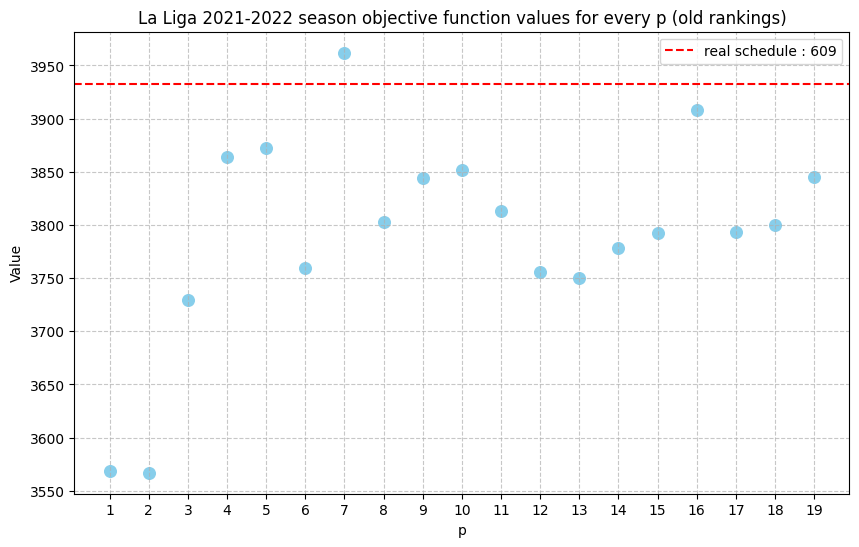

In [ ]:
#big_obj_values = [3604.0, 3735.0, 3616.0, 3575.0, 3696.0, 3509.0, 3563.0, 3636.0, 3604.0, 3557.0, 3758.0, 3551.0, 3606.0, 3706.0, 3540.0, 3495.0, 3492.0, 2404.0, 3564.0]
#big_obj_values = [3569.0, 3567.0, 3729.0, 3864.0, 3872.0, 3760.0, 3962.0, 3803.0, 3844.0, 3852.0, 3813.0, 3756.0, 3750.0, 3778.0, 3792.0, 3908.0, 3793.0, 3800.0, 3845.0]
print(big_obj_values)
print(len(big_obj_values))
# Your existing code to create the scatter plot
indices = range(1, len(big_obj_values) + 1)

plt.figure(figsize=(10, 6))
plt.scatter(indices, big_obj_values, color='skyblue', s=70)
plt.title('La Liga 2021-2022 season objective function values for every p (old rankings)')
plt.xlabel('p')
plt.ylabel('Value')
plt.xticks(indices)  # Set x-axis ticks to match indices
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a straight line at y = 45867 with red color
plt.axhline(y=3933, color='red', linestyle='--', label='real schedule : 609')
#20 random scheduleın ortalaması
#plt.axhline(y=4039, color='green', linestyle='--', label='mean of 20 random schedules : 4039')

plt.legend()  # Show the legend including the added line
plt.show()
#3952, 3946, 4107

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3569.0, 3423.0, 3427.0, 3449.0, 3314.0, 3145.0, 3164.0, 2987.0, 2904.0, 2861.0, 2833.0, 2772.0, 2749.0, 2727.0, 2765.0, 2622.0, 2507.0, 2344.0, 2141.0]
19


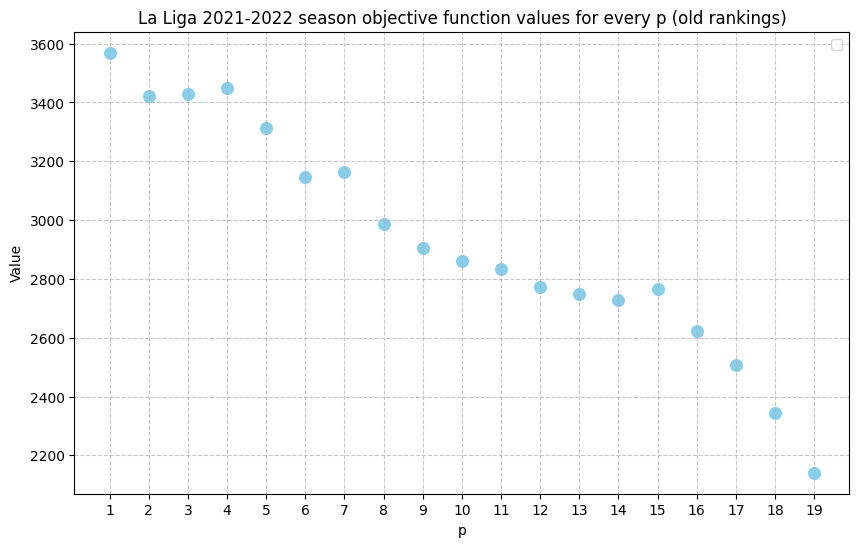

In [ ]:
#ok2 = [3604.0, 3735.0, 3616.0, 3575.0, 3696.0, 3509.0, 3563.0, 3636.0, 3604.0, 3557.0, 3758.0, 3551.0, 3606.0, 3706.0, 3540.0, 3495.0, 3492.0, 2404.0, 3564.0]

print(ok2)
print(len(ok2))
# Your existing code to create the scatter plot
indices = range(1, len(ok2) + 1)

plt.figure(figsize=(10, 6))
plt.scatter(indices, ok2, color='skyblue', s=70)
plt.title('La Liga 2021-2022 season objective function values for every p (old rankings)')
plt.xlabel('p')
plt.ylabel('Value')
plt.xticks(indices)  # Set x-axis ticks to match indices
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a straight line at y = 45867 with red color
#plt.axhline(y=2650, color='red', linestyle='--', label='real schedule : 609')
#20 random scheduleın ortalaması
#plt.axhline(y=4039, color='green', linestyle='--', label='mean of 20 random schedules : 4039')

plt.legend()  # Show the legend including the added line
plt.show()
#3952, 3946, 4107